

## Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, it was difficult to identify the potential customers because customers were contacted at random without looking at the available information.


The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

This time company wants to harness the available data of existing and potential customers to target the right customers.

## Customer details:

1. CustomerID: Unique customer ID
2. ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
3. Age: Age of customer
4. TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
5. CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
6. Occupation: Occupation of customer
7. Gender: Gender of customer
8. NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
9. PreferredPropertyStar: Preferred hotel property rating by customer
10. MaritalStatus: Marital status of customer
11. NumberOfTrips: Average number of trips in a year by customer
12. Passport: The customer has a passport or not (0: No, 1: Yes)
13. OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
14. NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
15. Designation: Designation of the customer in the current organization
16. MonthlyIncome: Gross monthly income of the customer

# **Our Objective:**

**Build a model to predict which customer is more likely to purchase the newly introduced travel package.**


# Main questions:
1. What factor determines the purchasing habit of customers?
2. How are different characteristic variables related to purchasing habit?
3. What should be done and what should be the focus of the agency to increase the business?
4. What is the best model to predict the customer behavior of buying the product, and which is the most important predictor of the byuing habit?



## import libraries


In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as mpl
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", 200)
# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve
# For pandas profiling
from pandas_profiling import ProfileReport
from sklearn.model_selection import GridSearchCV


## Data loading

In [4]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')
#Load the file
dataTourism = pd.read_csv('/content/drive/MyDrive/AIML/Project4_TravelPackagePrediction/TourismDataCSVformat.csv')
#wine = pd.read_csv('winequality.csv',sep=';')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# copying data to another varaible to avoid any changes to original data
data = dataTourism.copy()

### Exploring Data

In [6]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [7]:
#shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 4888 rows and 20 columns.


In [8]:
data.info() # looking at the structure of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

## Feature Enginering.

In [9]:
data.isnull().sum().sort_values(ascending=False) # if there are any null values in the data or missing values

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

* There are 251 missing values in Duration of Pitch, 233 missing values in Monthly Income. We will take care of this before modeling.

In [10]:
print (data.nunique()) # This prints the number of unique values.

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64


In [11]:
# lets check if there are duplicates
data.duplicated().sum()

0

In [12]:
# lets check if there are duplicates
data.duplicated().sum() # this line checks how many duplicate lines are there
data[data.duplicated(keep=False) == True]
# If there are duplicate we would do this: df.drop(TTT, inplace=True), in place of TTT include the ID number or row number, I am writing this for my reference.

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome


There are no duplicates! GREAT!!!

In [13]:
# lets drop CustomerID column since it will not be included in our model later on.
#data.drop(['CustomerID'],axis=1,inplace=True)

In [14]:
data['Gender'].value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

Fe Male is Female, lets fix this. Lets delete this gap.

In [15]:
data["Gender"] = data["Gender"].str.replace("Fe Male", "Female")

In [16]:
data['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

Great we fixed this thing!

# Preprocessing

Lets separate the variables here.
ProdTaken is our response variable. This is yes/no. So this should be categorical.
TypeofContact, Occupation, ProductPitched, MaritalStatus, Designation: These are categories, so we have to convert them to categorical variables.

In [17]:
# changing the variable type.
columnTOconvert = ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation', 'CityTier','Passport','OwnCar']
data[columnTOconvert] = data[columnTOconvert].astype('category')

### Missing Values (We will treat missing values in the modeling section below, but here we are just checkig for them) 

In [18]:
data.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

There are many missing values.

Lets drop CustomerID, as it will not be used in our analysis.

In [19]:
data.drop(['CustomerID'],axis=1,inplace=True) 

In [20]:
data.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


Great we dont have CustomerID now.

#**EDA Continuous variables**

In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,0.188216,0.390925,0.0,0.0,0.0,0.0,1.0
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.0,5.0
NumberOfChildrenVisiting,4822.0,1.187267,0.857861,0.0,1.0,1.0,2.0,3.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.0,22347.0,25571.0,98678.0


**Summary**
* There are 4863 customers.
* Customer age ranges from 18 to 61. The median is 36, which is less than mean, the distribution is right skewed. This means most customers are below 36 years of age.
* Mean number of person visiting is 2.9, with a range from 1 to 5.
* On anaverage 3.2 trips are made, and this ranges from 1 to 22. The median number of trips if 3, this is left skewed, implying that there are many people who make less than 3.2 trips in a year. 
* Average pitch satisfaction if 3.07, and this is close to the median. This means most customers are satisfied and the ratig is above average.
* Number of childern visting ranges from 1 to 3, with a mean of 1.18.

In [22]:
data.describe(include=["category"])

,TypeofContact,CityTier,Occupation,Gender,ProductPitched,MaritalStatus,Passport,OwnCar,Designation
count,4863,4888,4888,4888,4888,4888,4888,4888,4888
unique,2,3,4,2,5,4,2,2,5
top,Self Enquiry,1,Salaried,Male,Basic,Married,0,1,Executive
freq,3444,3190,2368,2916,1842,2340,3466,3032,1842


* There are 5 unique designation, 4 maritalstatus, 5 productpitched, 3 gender, 4 occupations and 2 types of contact.
* The most frequent designation is Executive, most customers are married, more than half are male, and most have jobs. Most customers made self enquiry.
* Most customers own a car.
* Most customers dont have passport.

##Univariate Analysis

In [23]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

Observation on Age

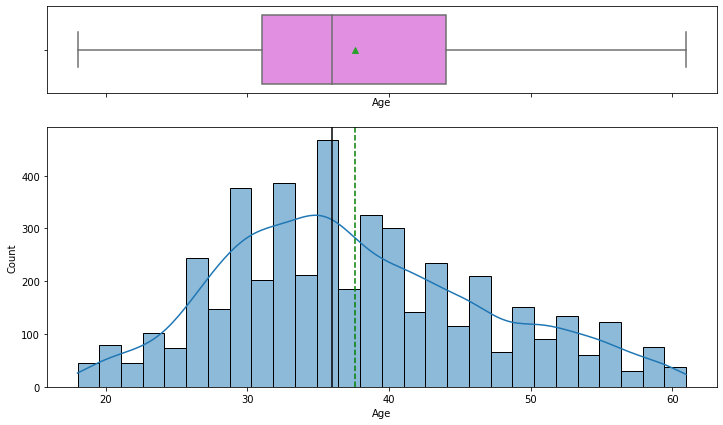

In [24]:
histogram_boxplot(data,'Age')

* The distribution is nearly symmetric with some outliers to the right. The mean (37.6) and median (36) values are close.
* There are no outliers. 

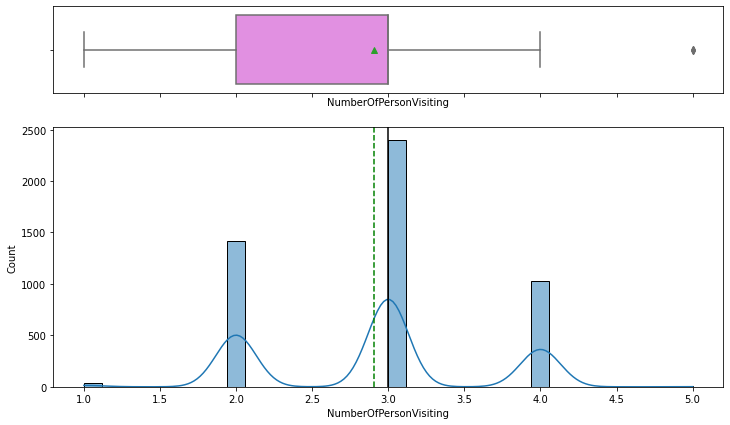

In [25]:
histogram_boxplot(data,'NumberOfPersonVisiting')

* There is outlier. Customers with 5 persons visiting fall into outlier.

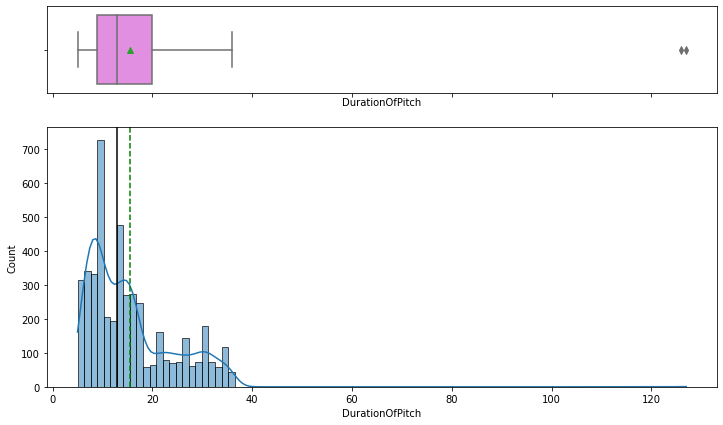

In [26]:
histogram_boxplot(data,'DurationOfPitch')

* The duration of pitch is right skewed. 
* A few customers need more than 120 hours of pitch.
* Most cudtomers need about 15 hours of pitch.

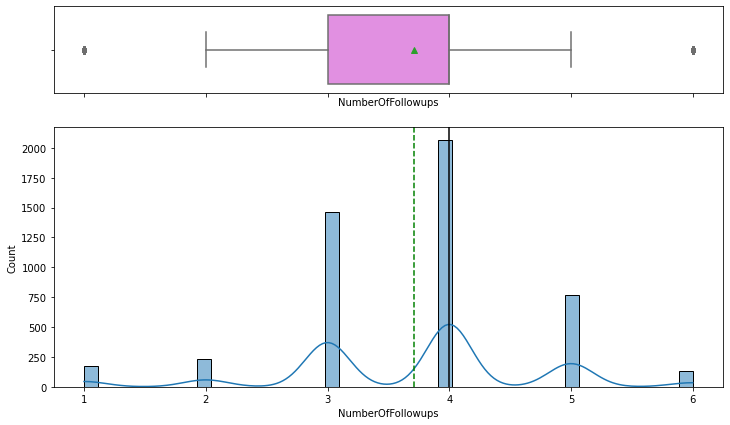

In [27]:
histogram_boxplot(data,'NumberOfFollowups')

* There are two outliers in the total number of followups done by the salesperson. Both 1 and 6 fall into outliers.
* Mean and median are almost close and the distribution looks normal.

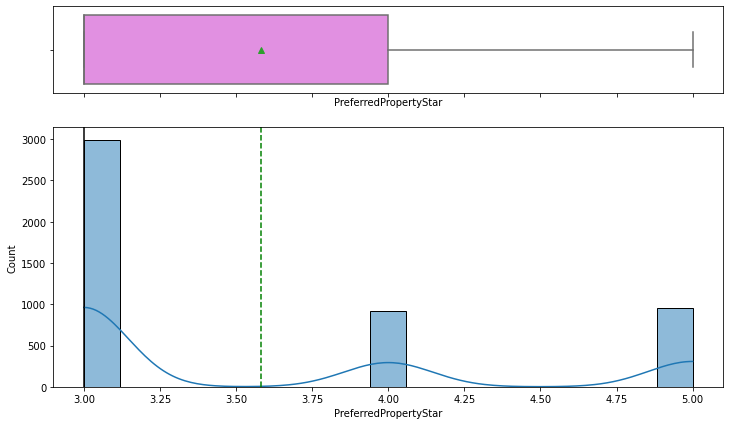

In [28]:
histogram_boxplot(data,'PreferredPropertyStar')

* Most customers prefer 3 star category.
* There are no outliers 

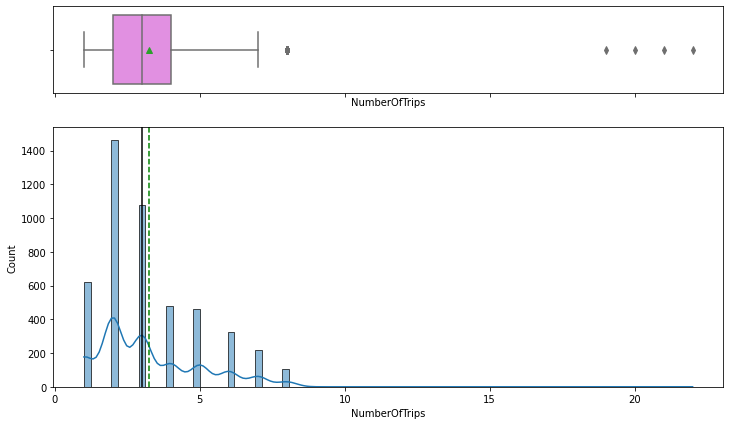

In [29]:
histogram_boxplot(data,'NumberOfTrips')

* The distribution is right skewed.
* There are many (5) outliers in the right end of the distribution.
* Customers who make more than 7 trips fall into outlier. 

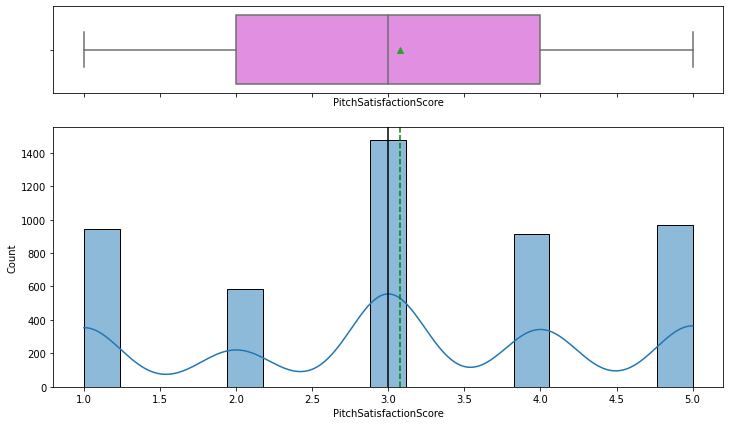

In [30]:
histogram_boxplot(data,'PitchSatisfactionScore')

* Most customers are satisfied with the sales pitch.
* The distribution is close to normal, with mean close to median.
* There are no outlier in the distributution.

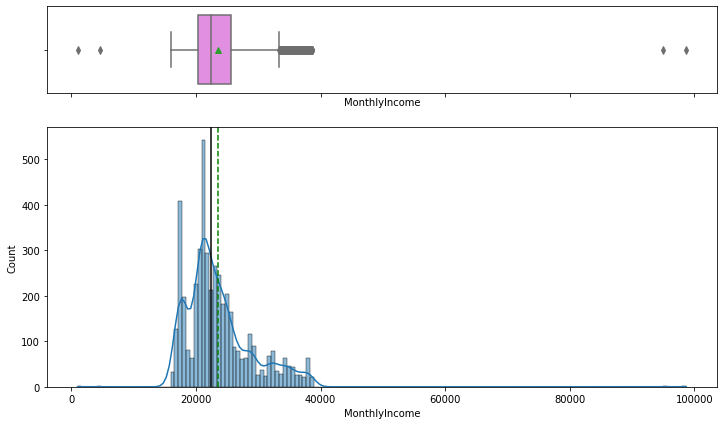

In [31]:
histogram_boxplot(data,'MonthlyIncome')

* The distribution is right skewed.
* There are outliers in both ends of the distribution.
* There are two outliers at the extreme ends of the distributuion (2 are making close to nothing and 2 are making close to 100k). In addition, there are many customers in the right end of the distributon that fall in outlier.

In [32]:
# function below creates labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

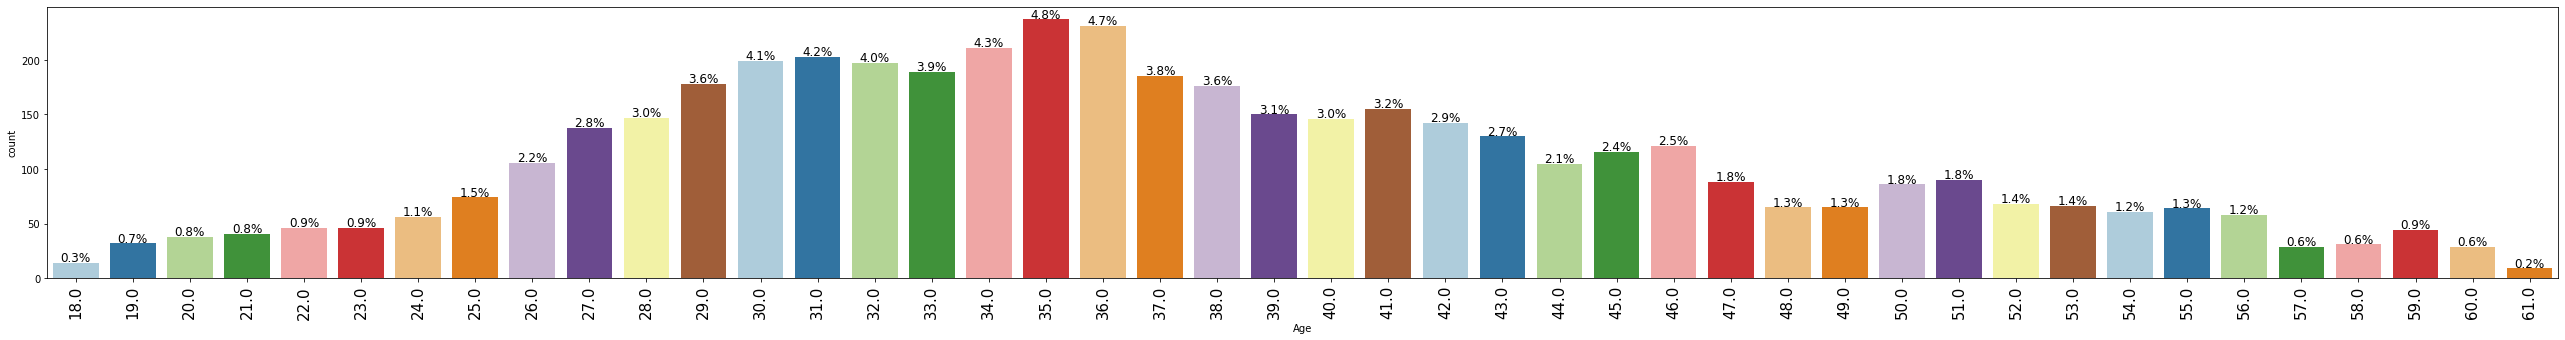

In [33]:
labeled_barplot(data, "Age", perc=True)

* Almost 14% customers are between the age of 34-36.
* Less than 1% customers are less than 24 or above 56 years.

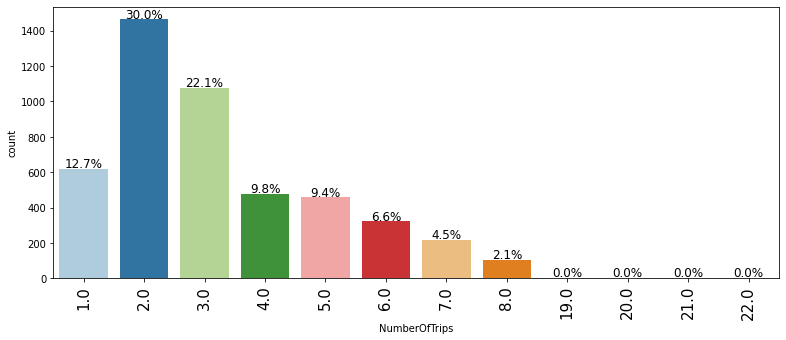

In [34]:
labeled_barplot(data, "NumberOfTrips", perc=True)

* 30% customers make 2 trips per year and 22.1% customers make 3 trips per year.
* Very few customers make more than 19 trips per year.

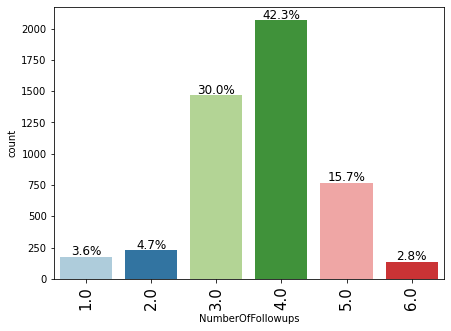

In [35]:
labeled_barplot(data, "NumberOfFollowups", perc=True)

* Most followups was 4, and it accounted for 42% of the followups.
* Second most followups was 3, and it accounted for 30% of the total followups.
* followup 6 accounted for 2.8% of the total count.

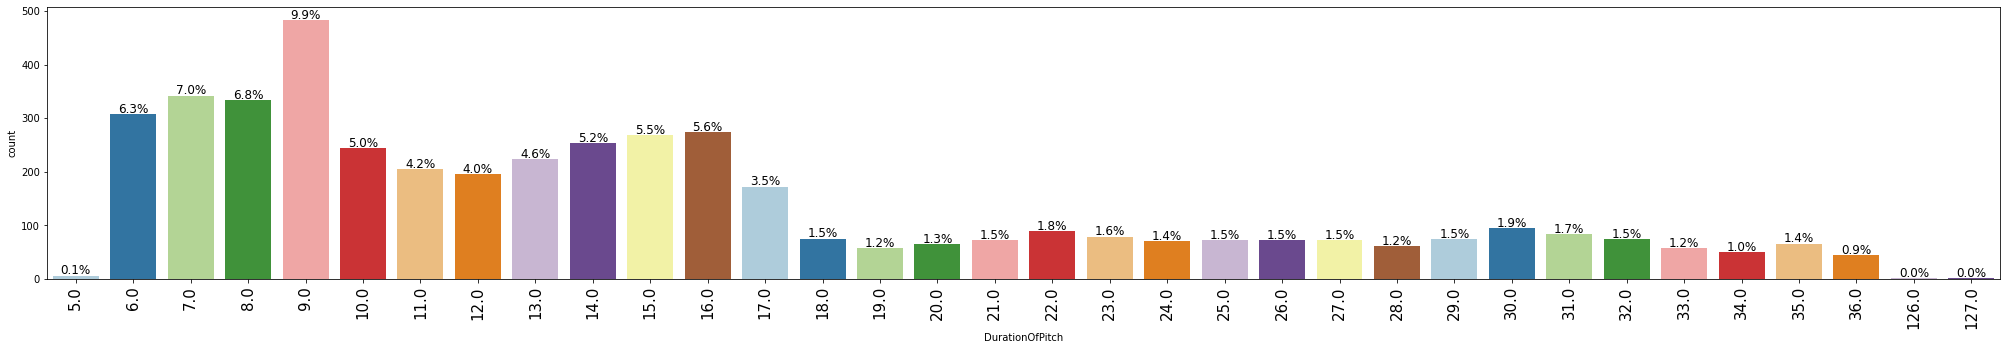

In [36]:
labeled_barplot(data, "DurationOfPitch", perc=True)

* About 10% accounted for 9 hours of pitch.
* Almost everybody required at least 6 hours of pitch duration.

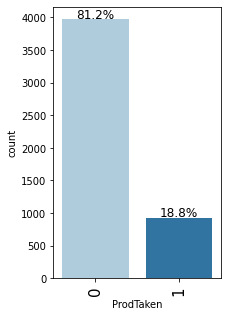

In [37]:
labeled_barplot(data, "ProdTaken", perc=True)

* Of all, only 18.9% of the prodct is taken.
* Majority of the cases, the product is not sold or not taken, and that is 81%

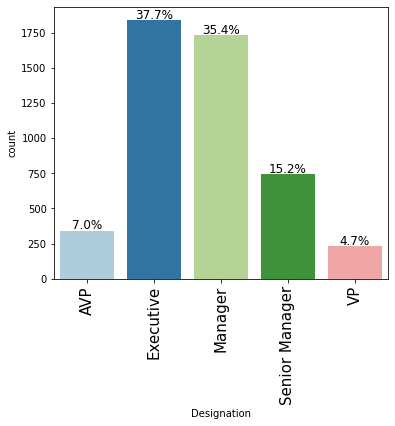

In [38]:
labeled_barplot(data, "Designation", perc=True)

* Most are executives, 37.7%
* Managers account for 35.3%
* 15.3% are Senior Manager
* 7% are AVP and 4.7% are VP.

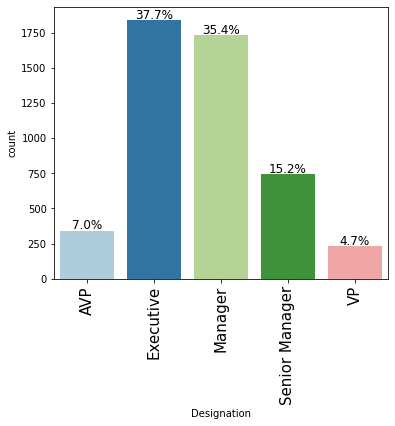

In [39]:
labeled_barplot(data, "Designation", perc=True)

# Bivariate and Multivariate Analysis

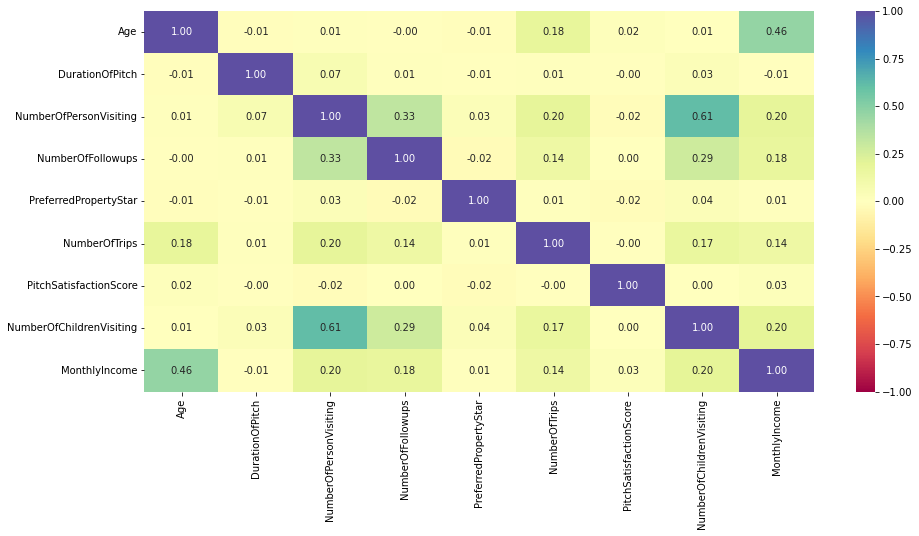

In [40]:
# Include only numeric variables
select_var =  ['Age','DurationOfPitch','NumberOfPersonVisiting','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','PitchSatisfactionScore','NumberOfChildrenVisiting','MonthlyIncome'] # select variable column
corr = data[select_var].corr()
# display heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**summary**
* Age is correlated with MonthlyIncome (0.46). Higher ages earn more.
* NumberOfPersonVisiting correlates with the NumberOfChildrenVisiting (0.61). This makes logical sense.
* DurationOfPitch, PreferredPropertOfStar show poor correlation with other variables.
* Number of trips and age are correlated to some extent (0.18). This means older people make more trips.

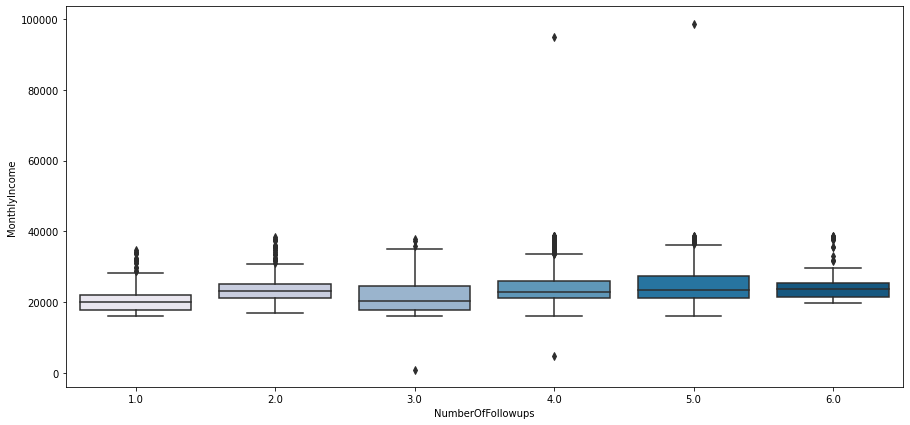

In [41]:
plt.figure(figsize=(15,7))
sns.boxplot(data = data, x = data["NumberOfFollowups"], y = data["MonthlyIncome"],palette="PuBu")
plt.show()

* Number of followup is smaller (4 and 5) for customers earning relatively more than those earning less (6).


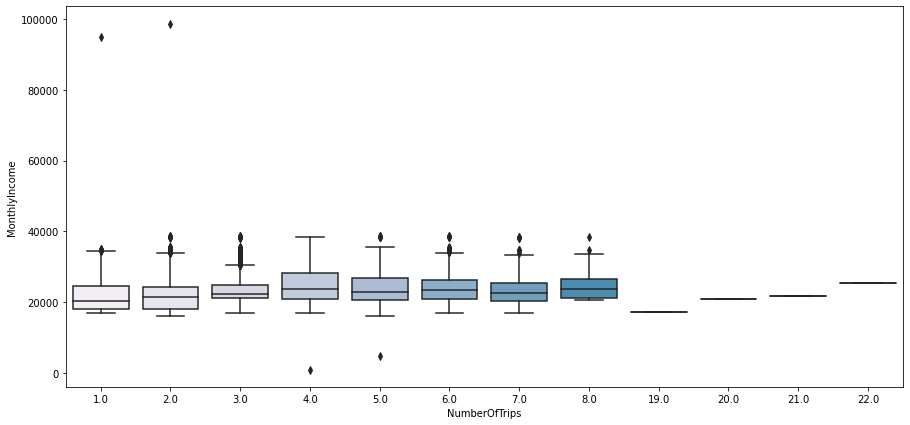

In [42]:
plt.figure(figsize=(15,7))
sns.boxplot(data = data, x = data["NumberOfTrips"], y = data["MonthlyIncome"],palette="PuBu")
plt.show()

* Highest earners make only 1 -2 trips per year.
* People making 4-6 number of trips per year earn on similar range.
* People making 8 trips per year earn more than others.

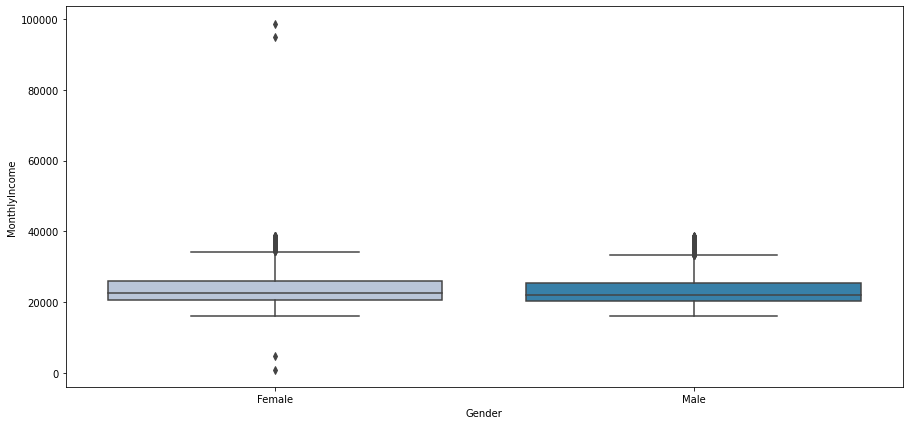

In [43]:
plt.figure(figsize=(15,7))
sns.boxplot(data = data, x = data["Gender"], y = data["MonthlyIncome"],palette="PuBu")
plt.show()

* Female average earning is more than male's earning.
* There is a wide range of variation in female monthly income than that of male.

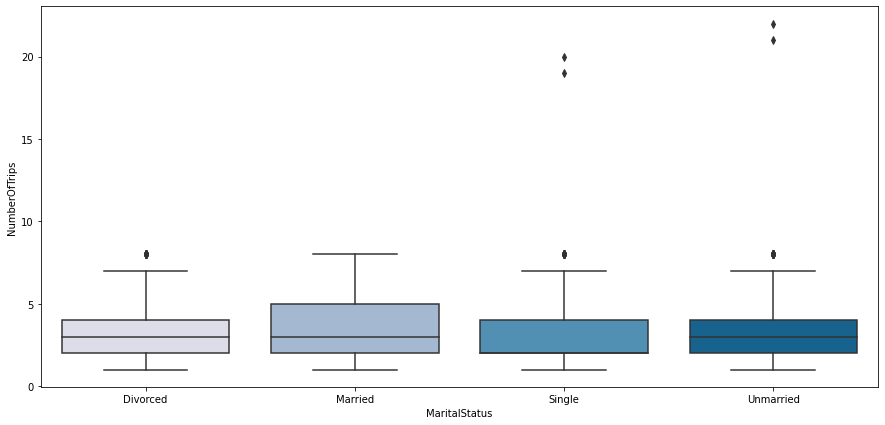

In [44]:
plt.figure(figsize=(15,7))
sns.boxplot(data = data, x = data["MaritalStatus"], y = data["NumberOfTrips"],palette="PuBu")
plt.show()

* Married people make more trips than other in general.
* A few unmarried and single make up to 20 trips a year.

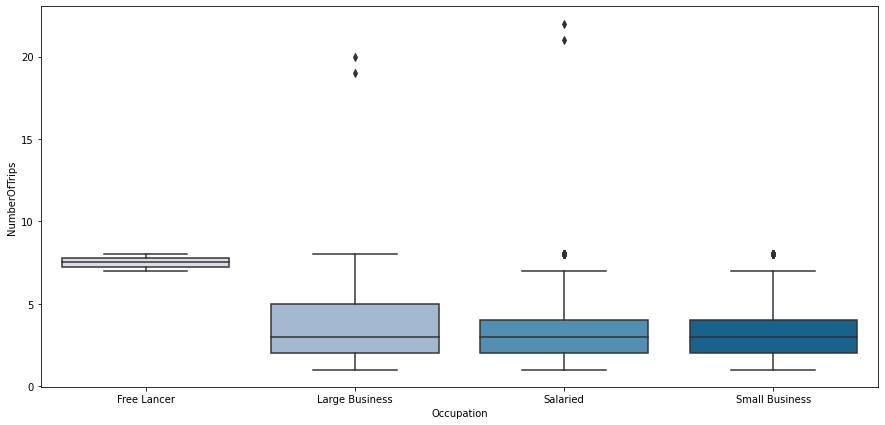

In [45]:
plt.figure(figsize=(15,7))
sns.boxplot(data = data, x = data["Occupation"], y = data["NumberOfTrips"],palette="PuBu")
plt.show()

* Large business people make most trips.
* Free Lancers make most number of trips per year in general.
* In terms of business, the agency should focus on freelancer and large business owners.
* Small business owner make the least number of trips per year. So, the agency should focus less on small business owners.

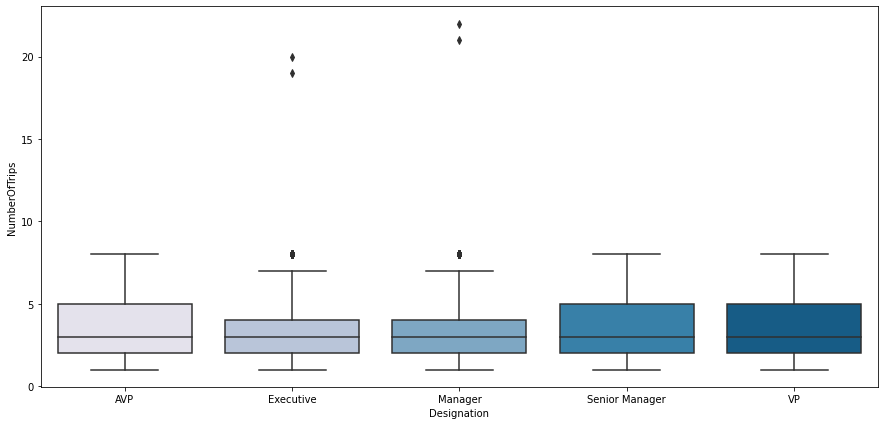

In [46]:
plt.figure(figsize=(15,7))
sns.boxplot(data = data, x = data["Designation"], y = data["NumberOfTrips"],palette="PuBu")
plt.show()

* Except three outliers, Managers and Executeives do not make most trips a year.
* Senior Managers and AVP, and VP make most trips a year.
* Agency should focus on selling trips to these people: Managers, AVP, and VP

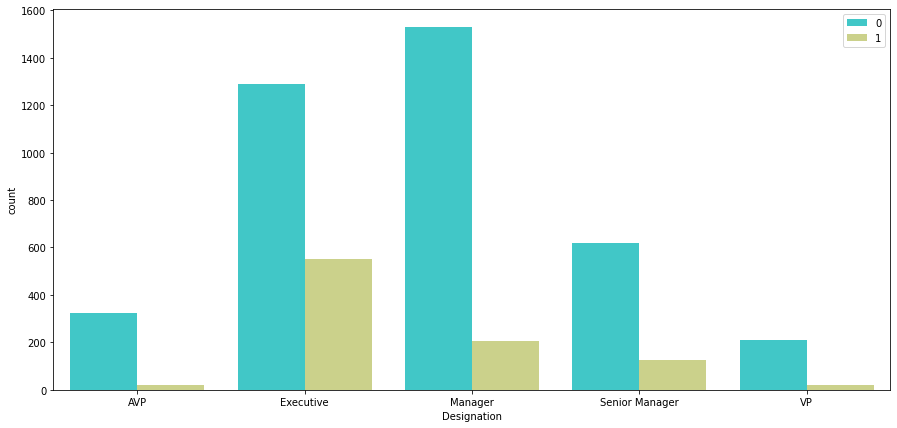

In [47]:
plt.figure(figsize=(15,7))
sns.countplot(data = data, x = data["Designation"],hue=data["ProdTaken"],palette='rainbow')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

**summary**
* Among all designations, Executives were the ones who took the product (~ 600).
* Managers come second (~200).
* Most customers are Managers but most of them did not buy the package.
* For the business, the agency should focus on selling prodct to executives as they are buying the product.
* Also, spend less time and energy on pitching the plans to Managers, and Senior Managers as they are not buying the product as executives are.

# **Conclusions from EDA:**

* There are 4888 rows and 20 columns.
* There are 251 missing values in Duration of Pitch, 233 missing values in Monthly Income. There are many missing values and empty rows.
* Mean number of person visiting is 2.9, with a range from 1 to 5.
* On anaverage 3.2 trips are made, and this ranges from 1 to 22. The median number of trips if 3, this is left skewed, implying that there are many people who make less than 3.2 trips in a year. 
* Average pitch satisfaction if 3.07, and this is close to the median.
* Number of childern visting ranges from 1 to 3, with a mean of 1.18.
* There are 5 unique designation, 4 maritalstatus, 5 productpitched, 3 gender, 4 occupations and 2 types of contact.
* The most frequent designation is Executive, most customers are married, more than half are male, and most have jobs. Most customers made self enquiry.
* Most customers own a car.
* Most customers dont have passport.
* The Age distribution is nearly symmetric with some outliers to the right. The mean (37.6) and median (36) values are close.
* There are no outliers in Age. 
* There is outlier in numberof customer visiting. Customers with 5 persons visiting fall into outlier.
* The duration of pitch is right skewed. 
* A few customers need more than 120 hours of pitch.
* Most cudtomers need about 15 hours of pitch.
* There are two outliers in the total number of followups done by the salesperson. Both 1 and 6 fall into outliers.
* Mean and median are almost close and the distribution looks normal.
* Most customers prefer 3 star category.
* There are many (5) outliers in the right end of the distribution in Number of Trips.
* Most customers are satisfied with the sales pitch.
* The customer satisfaction distribution is close to normal, with mean close to median.
* There are no outlier in the customer satisfaction distributution.
* The monthly income distribution is right skewed.
* There are two outliers at the extreme ends of the distributuion (2 are making close to nothing and 2 are making close to 100k). In addition, there are many customers in the right end of the distributon that fall in outlier.
* Almost 14% customers are between the age of 34-36.
* Less than 1% customers are less than 24 or above 56 years.
* 30% customers make 2 trips per year and 22.1% customers make 3 trips per year.
* Very few customers make more than 19 trips per year.
* Most followups was 4, and it accounted for 42% of the followups.
* Second most followups was 3, and it accounted for 30% of the total followups.
* followup 6 accounted for 2.8% of the total count.
* About 10% accounted for 9 hours of pitch.
* Almost everybody required at least 6 hours of pitch duration.
* Of all, only 18.9% of the prodct is taken.
* Majority of the cases, the product is not sold or not taken, and that is 81%.
* Most customers are executives, 37.7%
* Managers account for 35.3%
* 15.3% are Senior Manager
* 7% are AVP and 4.7% are VP.
* Age is correlated with MonthlyIncome (0.46). Higher ages earn more.
* NumberOfPersonVisiting correlates with the NumberOfChildrenVisiting (0.61). This makes logical sense.
* DurationOfPitch, PreferredPropertOfStar show poor correlation with other variables.
* Number of trips and age are correlated to some extent (0.18). This means older people make more trips.
* Number of followup is smaller (4 and 5) for customers earning relatively more than those earning less (6).
* Highest earners make only 1-2 trips per year.
* People making 4-6 number of trips per year earn on similar range.
* People making 8 trips per year earn more than others.
* Female average earning is more than male's earning.
* There is a wide range of variation in female monthly income than that of male.
* Married people make more trips than other in general.
* A few unmarried and single make up to 20 trips a year.
* Large business people make most trips.
* Free Lancers make most number of trips per year in general.
* Small business owner make the least number of trips per year. So, the agency should focus less on small business owners.
* Except three outliers, Managers and Executeives do not make most trips a year.
* Agency should focus on selling trips to these people: Executive and Managers.
* Among all designations, Executives were the ones who took the product (~ 600).
* Managers come second (~200).
* Most customers are Managers but most of them did not buy the package.
* For the business, the agency should focus on selling prodct to executives as they are buying the product.



# **Recomendations:**
* Customer age ranges from 18 to 61. The median is 36, which is less than mean, the distribution is right skewed. This means most customers are below 36 years of age. So, when targeting new customers, it is recommended to focus on this age group.
* Most customers are satisfied as the rating is above average. Therefore, provide incentives and praise the customer service people or the sales persons.
* Less than 1% customers are less than 24 or above 56 years. So, focus less on customers who are outside of this age group. 
* The most frequent customers are executives, who are are married. This should be the target group of the agency.
* 7% are AVP and 4.7% are VP customers. THis means agency should focus less on these categories.
* In terms of business, the agency should also focus on freelancer and large business owners.
* Also, if you have managers and executives as your potential customers, spend less time and energy on pitching the plans to Managers as they are not buying the product as executives are.


# Data Preparation/ Preprocessing

## Missing Value Treatment

In [48]:
data.isna().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

There are many missing values.

In [49]:
#Lets take care of missing values one by one. Lets start from Age and MonthlyIncome
MissingValuesColumns = data.select_dtypes(include=np.number).columns.tolist()
MissingValuesColumns

['ProdTaken',
 'Age',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'PitchSatisfactionScore',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

For MonthlyIncome, lets impute the missing rows by grouping them according to their position level, designation. For all others, lets impute the median values. Also, it makes sense to impute Age according to the MonthlyIncome **YES**, I am saying by monthly income. This is because, monthlyIncome and Age are very much correlated. If you dont believe that, look at the correlation in the bivariate section. But here I am just using median value for Age also. 


In [50]:
#Lets separate MonthlyIncome for now.
MissingValuesColumns.remove('MonthlyIncome')


Since median values do not change the distributions, lets impute the missing rows with median values. **As have never been a fan of imputing missing rows with Median. This is because it makes the distribution narrower than the earlier one. However, I tried deleting missing rows rather than imputing them with Median, and ran the entire model. But the final results were not helpful. The results were good when I used median imputation. At least it worked for this dataset. So, below is the result for imputed dataset**

In [51]:
#This will replace missing rows with median values
medianFiller = lambda x: x.fillna(x.median()) 
data[MissingValuesColumns] = data[MissingValuesColumns].apply(medianFiller,axis=0)

In [52]:
#For MonthlyIncome, it makes sense to first group them by their position and then impute using median of those positions.
data["MonthlyIncome"] = data.groupby(['Designation'])['MonthlyIncome'].transform(lambda x: x.fillna(x.median()))

In [53]:
data.isna().sum()

ProdTaken                    0
Age                          0
TypeofContact               25
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups            0
ProductPitched               0
PreferredPropertyStar        0
MaritalStatus                0
NumberOfTrips                0
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting     0
Designation                  0
MonthlyIncome                0
dtype: int64

There are 25 empty rows. We could impute them with median. But lets delete those rows, they are just 25 rows.

In [54]:
data['TypeofContact'].value_counts()

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

Lets drop rows that are empty!

In [55]:
data = data.dropna(subset=['TypeofContact'])

In [56]:
data.isna().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

GREAT!!! We took care of missing values now.

## Checking For Outliers: 

Lets define q1 and q3. In reality, we can set our own lower and upper limit, it doesnt have to be quartile ranges. We can do, +/- 2SD or 3SD or any limit depending upon the data. 
Also, its not always a good idea to discard outliers. However, lets check before we make decision, just in case if there are any outliers.

In [57]:
q1 = data.quantile(0.25)        
q3 = data.quantile(0.75)

Lets define interquartile range, which is the difference between q3 and a1

In [58]:
iqr = q3 - q1

To find the outliers, we declare upper and lower quartiles. Values outside of this bound are outliers.

In [59]:
lower=q1-1.5*iqr                    
upper=q3+1.5*iqr

In [60]:
ValuesOutlier = data.select_dtypes(include=np.number)

In [61]:
((ValuesOutlier<lower)|(ValuesOutlier>upper)).sum()/len(data)*100

ProdTaken                   18.856673
Age                          0.000000
DurationOfPitch              2.303105
NumberOfPersonVisiting       0.061690
NumberOfFollowups            6.333539
PreferredPropertyStar        0.000000
NumberOfTrips                2.241415
PitchSatisfactionScore       0.000000
NumberOfChildrenVisiting     0.000000
MonthlyIncome                7.567345
dtype: float64

There are no outliers in: Age, PreferredPropertyStar, PitchSatisfactionScore, NumberOfChildrenVisiting. So, we dont need to worry about these at all! 

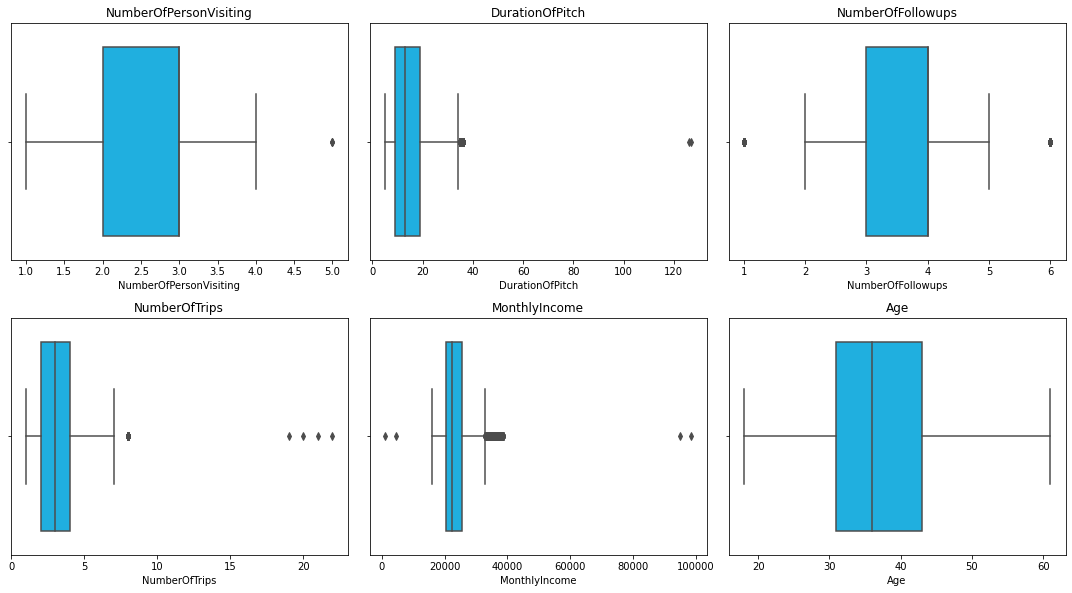

In [62]:
selected_columns = ['NumberOfPersonVisiting','DurationOfPitch','NumberOfFollowups', 'NumberOfTrips','MonthlyIncome','Age']#Select columns to plot
plt.figure(figsize=(15, 12)) # Figure size

for i, variable in enumerate(selected_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=data, x=variable, color = "deepskyblue")
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Since there are very few outliers in other variables, we will let as they are. We will not exclude these. Most outliers are in ProdTaken and MonthlyIncome. We dont worry about ProdTaken, because that is what we want to predict. About Monthly Income, the values look reasonable, there could be people making 1000k monthly, and there are only 2 of those. So, lets not delete outliers as the values seem reasnoable. 

* Also, since wqe are using decision tree classifier, the beauty of this model is that the values are not affected by outliers. This is because it is a classifying model and it will still classify in the same category.

# Model Building:

**This is a major step**

**Model performance evaliuation criteria has to be fixed before building the model.**

This is our Evaluation criteria:

Here we want to maximize both sensitivity and specificity, therefore we select F1 score for model performance evaluation.

In [63]:
from sklearn.metrics import classification_report,confusion_matrix

def make_confusion_matrix(y_actual,y_predict):
    '''
    y_predict: Model Predicted class
    y_actual : Reality  
    '''
    sns.set(font_scale=2.0) # to set font size for the matrix
    cm=confusion_matrix(y_actual,y_predict)
    group_names = ['True -ve','False +ve','False -ve','True +ve']
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (8,6))
    sns.heatmap(cm, annot=labels,fmt='',cmap='Oranges')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [64]:
#Defining a function to calculate all the metric scores for the model
def scores(model,flag=True):
    """ model : classifier to predict X values """
    score_list=[] 
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    train_acc = metrics.accuracy_score(y_train,y_pred_train)
    test_acc = metrics.accuracy_score(y_test,y_pred_test)
    
    train_f1 = metrics.f1_score(y_train,y_pred_train)
    test_f1 = metrics.f1_score(y_test,y_pred_test)
    score_list.extend((train_acc,test_acc,train_f1,test_f1))
    
    if flag== True:
        print("Accuracy on training set : ",metrics.accuracy_score(y_train,y_pred_train))
        print("Accuracy on test set : ",metrics.accuracy_score(y_test,y_pred_test))

        print("\nRecall on training set : ",metrics.recall_score(y_train,y_pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,y_pred_test))
    
        print("\nPrecision on training set : ",metrics.precision_score(y_train,y_pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,y_pred_test))
    
        print("\nF1 on training set : ",metrics.f1_score(y_train,y_pred_train))
        print("F1 on test set : ",metrics.f1_score(y_test,y_pred_test))
    elif flag == False:
        return score_list
    



### Train and Test Split

In [65]:
X= data.drop(['ProdTaken'],axis=1)
y= data['ProdTaken']

In [66]:
X = pd.get_dummies(X, drop_first=True)

In [67]:
# Lets split this way: 30% for test and 70% for train. I shouldnt forget this: stratify will maintain the proportion of classes in test and train.
X_train,X_test, y_train, y_test =train_test_split(X,y, test_size=0.3, random_state=1,stratify=y)

Lets see how many rows are separated for test and train by printing them.

In [68]:
print(X_train.shape,X_test.shape)

(3404, 29) (1459, 29)


# Decision Tree

In [69]:

dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.15,1:0.85},random_state=1)

In [70]:
dtree.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

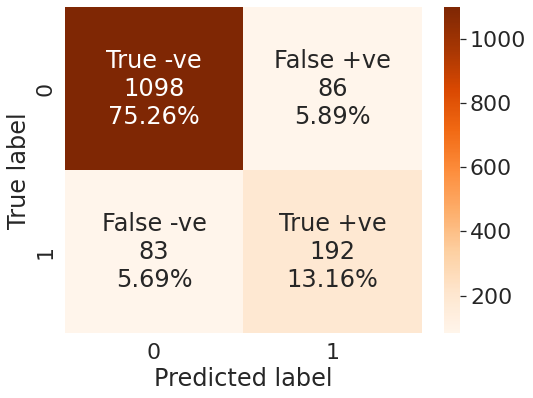

In [71]:
y_predict = dtree.predict(X_test) 
make_confusion_matrix(y_test,y_predict)

In [72]:
scores(dtree) #calculate scores

Accuracy on training set :  1.0
Accuracy on test set :  0.884167237834133

Recall on training set :  1.0
Recall on test set :  0.6981818181818182

Precision on training set :  1.0
Precision on test set :  0.6906474820143885

F1 on training set :  1.0
F1 on test set :  0.6943942133815552



* The F1 score for test set is 0.69, compared with the perfect (1) score on train set, which is clearly overfitting, it is doing much better in test set.
* Lets try some fine tuning this tree, if it helps.

## Fine Tuning Decision Tree

In [73]:
# Choose the type of classifier. 
DTclassifier = DecisionTreeClassifier(random_state=1,class_weight = {0:.15,1:.85}) #This will add classweights 

#Defining the Hyperparameters

parameters = {'max_depth': np.arange(5,35,5), 
            'criterion': ['gini','entropy'],
            'min_samples_leaf': [ 2, 5, 7, 10],
            'max_leaf_nodes' : [5, 7, 10, 12, 15],}

# Type of scoring used to compare parameter combinations
F1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search with the above parameters
grid_obj = GridSearchCV(DTclassifier, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set to the best combination of parameters
DTclassifierTuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
DTclassifierTuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=5, max_leaf_nodes=15, min_samples_leaf=7,
                       random_state=1)

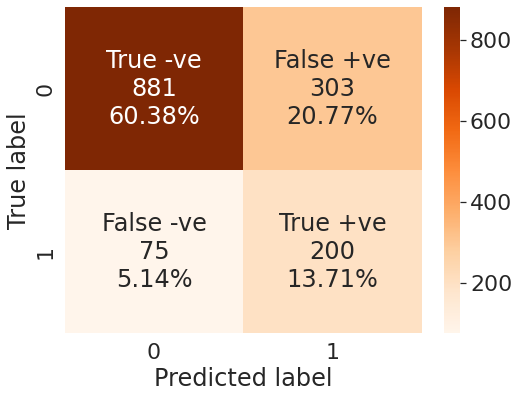

In [74]:
y_predict = DTclassifierTuned.predict(X_test) 
make_confusion_matrix(y_test,y_predict) 

In [75]:
scores(DTclassifierTuned)

Accuracy on training set :  0.7511750881316098
Accuracy on test set :  0.7409184372858122

Recall on training set :  0.721183800623053
Recall on test set :  0.7272727272727273

Precision on training set :  0.4093722369584439
Precision on test set :  0.3976143141153082

F1 on training set :  0.5222786238014664
F1 on test set :  0.5141388174807199


* Decision tree classifier even reduced with fine tuning. F1 on test set if 0.51. Compared with the earlier tree, with F1 = 0.69, this fine tuned tree is less accurate.
* There is one benefit of finetuning, though. The issue of overfitting got solved.

**Lets do bagging.**

#BAGGING

In [76]:
bagging = BaggingClassifier(random_state=1) 
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

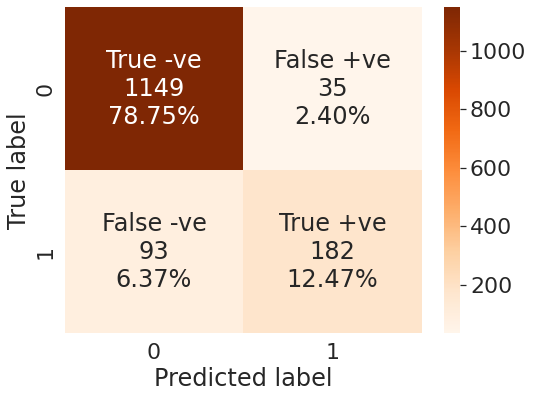

In [77]:
y_predict = bagging.predict(X_test)
make_confusion_matrix(y_test,y_predict)
#Creating confusion matrix
#confusion_matrix_sklearn(bagging,X_test,y_test)

In [78]:
scores(bagging)

Accuracy on training set :  0.9932432432432432
Accuracy on test set :  0.912268677176148

Recall on training set :  0.9657320872274143
Recall on test set :  0.6618181818181819

Precision on training set :  0.998389694041868
Precision on test set :  0.8387096774193549

F1 on training set :  0.9817893903404593
F1 on test set :  0.7398373983739839


* GREAT!!!! This classifier, **Bagging classifier** is much better than Decision Tree only classifier.
* Bagging classifier has F1 score of 0.73 on test set, compared to 0.69 on test set in Decision Tree classifier.

Lets try Bagging classifier with weighted decision tree, as we are asked in the problem.

In [79]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.15,1:0.85},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.15,
                                                                      1: 0.85},
                                                        random_state=1),
                  random_state=1)

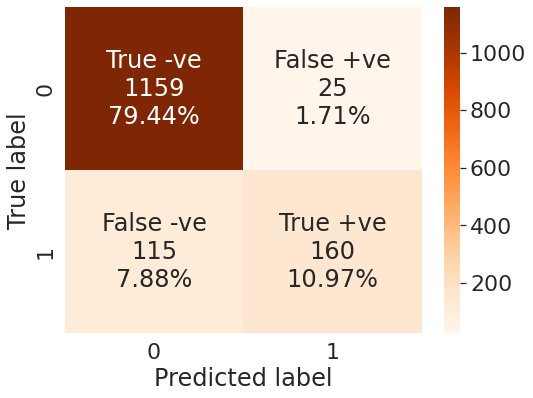

In [80]:
y_predict = bagging_wt.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [81]:
scores(bagging_wt)

Accuracy on training set :  0.9941245593419507
Accuracy on test set :  0.9040438656614119

Recall on training set :  0.9688473520249221
Recall on test set :  0.5818181818181818

Precision on training set :  1.0
Precision on test set :  0.8648648648648649

F1 on training set :  0.9841772151898734
F1 on test set :  0.6956521739130435


**OOPS** F1 on test set is (=0.69) back to what it was with just a decision tree (0.69). Clearly there is no benefit of bagging with weighted decision tree.


# Tuning Bagging hyperparameters

In [82]:
# grid search for bagging classifier
parameters = {
              'n_estimators':np.arange(40,80,5),
              'max_features': [0.7,0.8,0.9],
              'max_samples': [0.7,0.8,0.9], 
             }

#Assigning Bootstrap = True to select features with Replacement
bagging_tuned = BaggingClassifier(random_state=1,bootstrap=True)

# Type of scoring used to compare parameter combinations
F1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=65,
                  random_state=1)

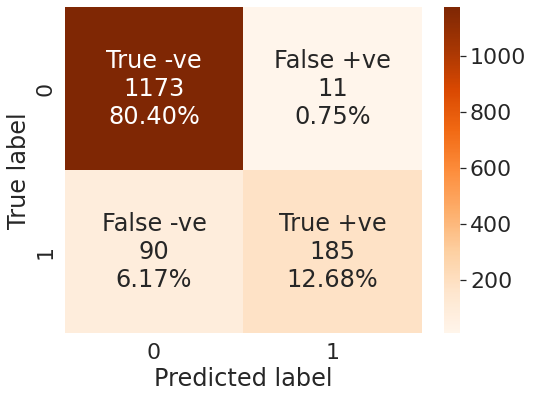

In [83]:
y_predict = bagging_estimator_tuned.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [84]:
scores(bagging_estimator_tuned)

Accuracy on training set :  1.0
Accuracy on test set :  0.9307745030843043

Recall on training set :  1.0
Recall on test set :  0.6727272727272727

Precision on training set :  1.0
Precision on test set :  0.9438775510204082

F1 on training set :  1.0
F1 on test set :  0.7855626326963907


* Great! Tuned hyperparamaters gave a good F1 score for Bagging, F1=0.78 on test set.
* There is some issue of overfitting. Look at the F1 score in train set, which is 0.1. We dont want such a huge gap between train and test set F1 score.

# Random Forest

In [85]:
random_forest = RandomForestClassifier(random_state=1)
random_forest.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

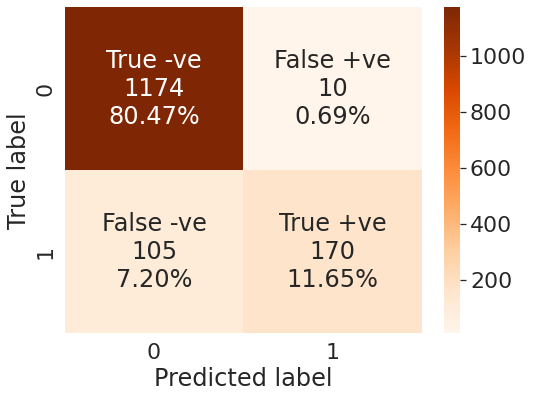

In [86]:
y_predict = random_forest.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [87]:
scores(random_forest)

Accuracy on training set :  1.0
Accuracy on test set :  0.9211788896504455

Recall on training set :  1.0
Recall on test set :  0.6181818181818182

Precision on training set :  1.0
Precision on test set :  0.9444444444444444

F1 on training set :  1.0
F1 on test set :  0.7472527472527473


* There is clearly an overfitting issue in train set.
* However, F1 score (0.74) has improved compared to Bagging and Decision Tree. There is however a a huge difference between F1/ Recall score on test and train set. We dont want a huge gap between the two score. This is an issue of overfitting.
* Lets try RF with weights.

In [88]:
random_forest_wt = RandomForestClassifier(class_weight={0:0.15,1:0.85},random_state=1)
random_forest_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

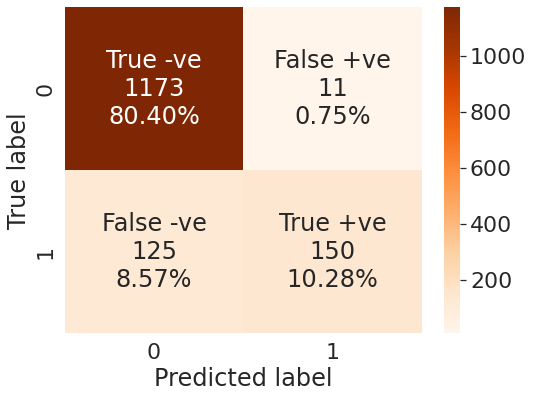

In [89]:
y_predict = random_forest_wt.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [90]:
scores(random_forest_wt)

Accuracy on training set :  1.0
Accuracy on test set :  0.9067854694996573

Recall on training set :  1.0
Recall on test set :  0.5454545454545454

Precision on training set :  1.0
Precision on test set :  0.9316770186335404

F1 on training set :  1.0
F1 on test set :  0.6880733944954128


**BUMMER**: F1 score is again 0.69, which is what we obtained for DT and RF. 
* There is an issue of overfitting here also.
there is no improvement in the metrics for the weighted Random Forest classifier.
* Lets do hyperparameter tuning for RF

In [91]:
# Grid of parameters to choose from
randomforest_tuned = RandomForestClassifier(class_weight={0:0.15,1:0.85},random_state=1)

parameters = {"n_estimators": np.arange(66,69,1), #OH MY GOD! I worked just on this tuning for so long. This was the narrow range wheere the model performed best.
              'criterion':['gini','entropy'],
            "min_samples_leaf": np.arange(3,5,1),
            "max_features":['sqrt','log2'],
            "max_samples": np.arange(0.7, 1, 0.1),
             }

# Type of scoring used to compare parameter combinations
F1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(randomforest_tuned, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.15, 1: 0.85}, max_features='sqrt',
                       max_samples=0.9999999999999999, min_samples_leaf=4,
                       n_estimators=67, random_state=1)

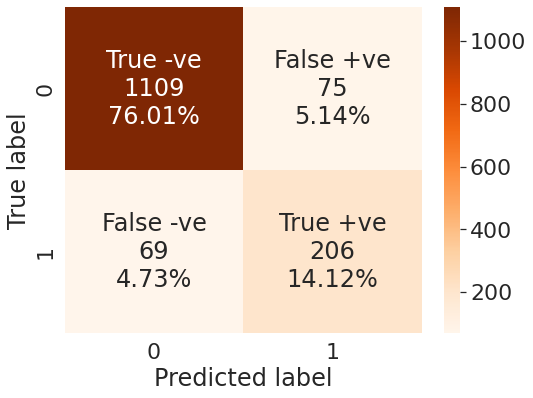

In [92]:
y_predict = rf_estimator_tuned.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [93]:
scores(rf_estimator_tuned)

Accuracy on training set :  0.9618096357226792
Accuracy on test set :  0.9013022618231665

Recall on training set :  0.9922118380062306
Recall on test set :  0.7490909090909091

Precision on training set :  0.8359580052493438
Precision on test set :  0.7330960854092526

F1 on training set :  0.9074074074074074
F1 on test set :  0.7410071942446044


* Fine tuned RF is slightly less accurate (0.74) than fine tuned Bagging decision tree model (0.75).
* Fine tuned RF took some care of the overfitting issue that bagging decision tree could not take. Look at the difference between F1 score train and test sets.

# AdaBoosting Model

In [94]:
Ada_boost = AdaBoostClassifier(random_state=1)
Ada_boost.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

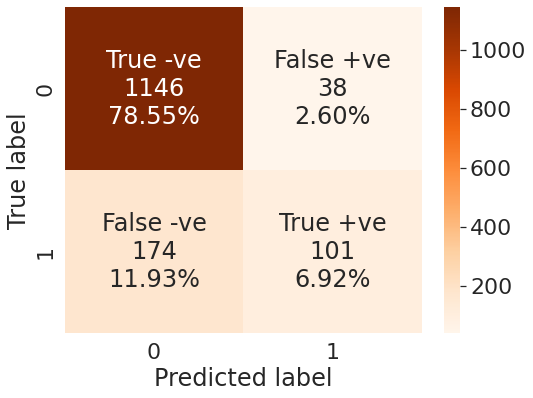

In [95]:
y_pred = Ada_boost.predict(X_test)
make_confusion_matrix(y_test,y_pred)

In [96]:
scores(Ada_boost)

Accuracy on training set :  0.8516451233842538
Accuracy on test set :  0.8546949965729952

Recall on training set :  0.35202492211838005
Recall on test set :  0.36727272727272725

Precision on training set :  0.7174603174603175
Precision on test set :  0.7266187050359713

F1 on training set :  0.4723092998955068
F1 on test set :  0.48792270531400955


* Adaboosting model F1 score is relatively lower (0.48) than eaarlier models.
* There is no issue of overfitting, look at the difference between test and train F1 score.
* Lets tune hyperparameters.

# Tuning AdaBoosting Model

In [97]:
# Choose the type of classifier. 
Ada_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,60,10),
    'learning_rate': [0.05,0.15,0.45,0.75]
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(Ada_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
Ada_boost_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
Ada_boost_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.75, random_state=1)

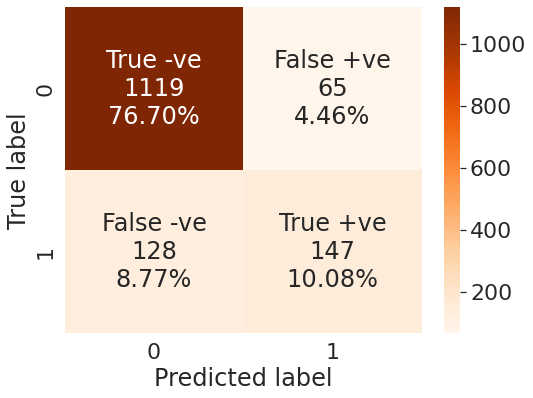

In [98]:
y_pred = Ada_boost_tuned.predict(X_test)
make_confusion_matrix(y_test,y_pred)

In [99]:
scores(Ada_boost_tuned)

Accuracy on training set :  0.9292009400705052
Accuracy on test set :  0.8677176148046607

Recall on training set :  0.7118380062305296
Recall on test set :  0.5345454545454545

Precision on training set :  0.8908382066276803
Precision on test set :  0.6933962264150944

F1 on training set :  0.7913419913419913
F1 on test set :  0.6036960985626284


* F1 score has improved from 0.48 (untuned) to 0.6 for hyperparameter tuned model.
* There is some issue of overfitting in the model. Look at the difference between F1 for train and test sets.

# Gradient Boosting Model

In [100]:
Grad_boost = GradientBoostingClassifier(random_state=1)
Grad_boost.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

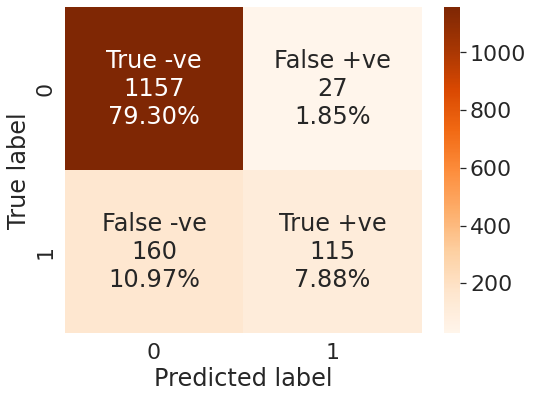

In [101]:
y_predict = Grad_boost.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [102]:
scores(Grad_boost)

Accuracy on training set :  0.8854289071680376
Accuracy on test set :  0.8718300205620287

Recall on training set :  0.4657320872274143
Recall on test set :  0.41818181818181815

Precision on training set :  0.8641618497109826
Precision on test set :  0.8098591549295775

F1 on training set :  0.605263157894737
F1 on test set :  0.5515587529976019


* F1 score is lower for Gradient boosting than Ada Boosting model.
* This model took care of issues of overfitting, look at the difference between train and test set F1 score.
* Lets tune hyperparameters of Gradient Boosting Model.

# Tuning Hyperparameters of Gradient Boosting Model

In [103]:
# Choose the type of classifier. 
Grad_boost_ada_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10,60,5),
    "subsample":[0.6,0.7,0.8],
    "max_features":[0.6,0.7,0.8],
    'learning_rate': [0.05,0.15,0.5]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(Grad_boost_ada_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
Grad_boost_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
Grad_boost_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.5, max_features=0.6, n_estimators=55,
                           random_state=1, subsample=0.8)

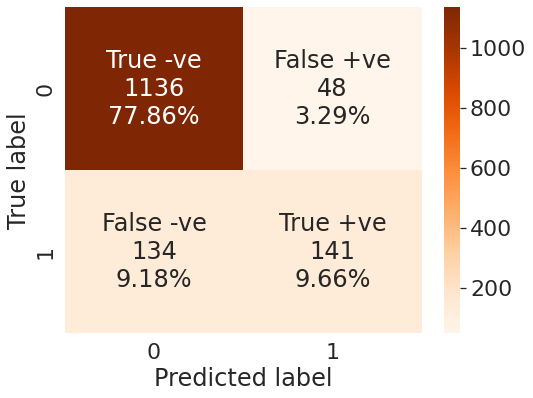

In [104]:
y_predict = Grad_boost_tuned.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [105]:
scores(Grad_boost_tuned)

Accuracy on training set :  0.918331374853114
Accuracy on test set :  0.8752570253598355

Recall on training set :  0.6370716510903427
Recall on test set :  0.5127272727272727

Precision on training set :  0.9008810572687225
Precision on test set :  0.746031746031746

F1 on training set :  0.7463503649635036
F1 on test set :  0.6077586206896552


* F1 for test set is 0.6.
* The differences between F1 train and test set is relatively lower than other models.

#XGBoosting Model

In [106]:
XG_boost = XGBClassifier(random_state=1, eval_metric='logloss')
XG_boost.fit(X_train,y_train)

XGBClassifier(eval_metric='logloss', random_state=1)

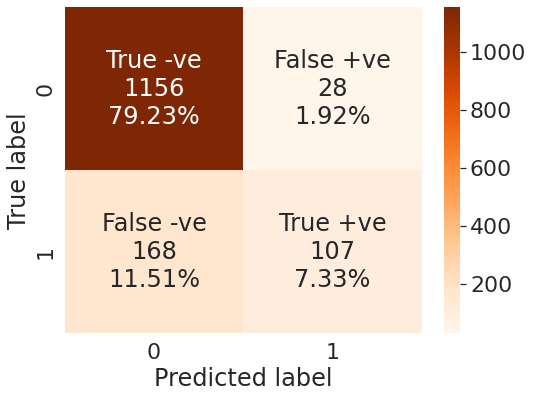

In [107]:
y_predict = XG_boost.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [108]:
scores(XG_boost)

Accuracy on training set :  0.8777908343125734
Accuracy on test set :  0.8656614119259767

Recall on training set :  0.4252336448598131
Recall on test set :  0.3890909090909091

Precision on training set :  0.853125
Precision on test set :  0.7925925925925926

F1 on training set :  0.5675675675675677
F1 on test set :  0.5219512195121953


* F1 score for test set in XGBoost model is less than tuned AdaBoosting model.
* XGboosting model takes care of overfitting issue. Look at the differences between F1 score on test and train set.

# Tuning Hyperparameters of XGBoosting Model

In [109]:
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10,60,10),
     "subsample":[0.6,0.7,0.8],
    "learning_rate":[0.1,0.3,0.55],
    "colsample_bytree":[0.5,0.7,0.9],
    "colsample_bylevel":[0.5,0.7,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(colsample_bylevel=0.7, colsample_bytree=0.7,
              eval_metric='logloss', learning_rate=0.55, n_estimators=40,
              random_state=1, subsample=0.8)

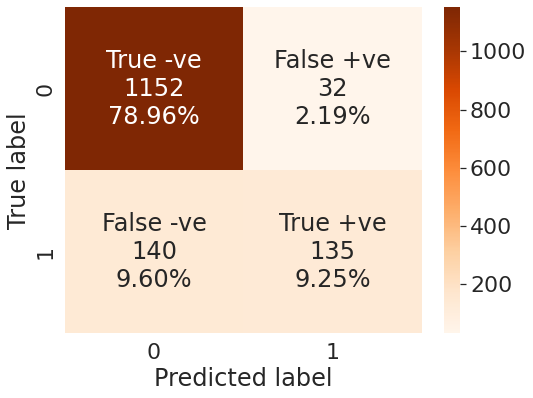

In [110]:
y_predict = xgb_tuned.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [111]:
scores(xgb_tuned)

Accuracy on training set :  0.900705052878966
Accuracy on test set :  0.882111034955449

Recall on training set :  0.543613707165109
Recall on test set :  0.4909090909090909

Precision on training set :  0.8857868020304569
Precision on test set :  0.8083832335329342

F1 on training set :  0.6737451737451737
F1 on test set :  0.6108597285067874


* Tuned XGBoost model has relatively higher F1 score than other models (**0.61**), for example, Adaboost model.
* Tuned XGBoosting takes care of overfitting issue. Look at the difference between F1 score in test and train set.

In [112]:
from sklearn.ensemble import StackingClassifier

In [113]:
estimators = [('Random Forest',rf_estimator_tuned),('ADA Boosting',Ada_boost_tuned),('Decision Tree',DTclassifierTuned)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.15,
                                                                     1: 0.85},
                                                       max_features='sqrt',
                                                       max_samples=0.9999999999999999,
                                                       min_samples_leaf=4,
                                                       n_estimators=67,
                                                       random_state=1)),
                               ('ADA Boosting',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                                   learning_rate=0.75,
                                                   random_state=1)),
                               ('Decision Tree',
                                DecisionTreeClassifier(class_weight={0:

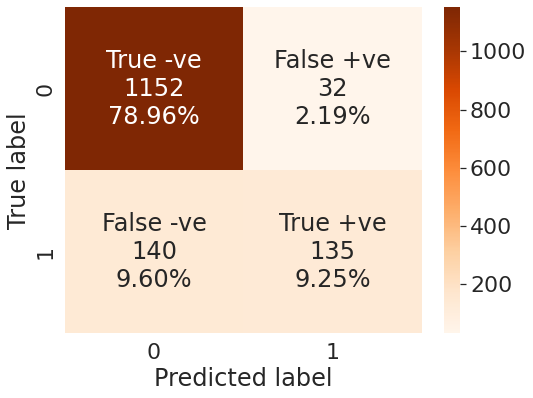

In [114]:
y_predict = xgb_tuned.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [115]:
scores(stacking_classifier)

Accuracy on training set :  0.981786133960047
Accuracy on test set :  0.9067854694996573

Recall on training set :  0.985981308411215
Recall on test set :  0.7127272727272728

Precision on training set :  0.922740524781341
Precision on test set :  0.7747035573122529

F1 on training set :  0.9533132530120482
F1 on test set :  0.7424242424242423


* The model has some issue of overfitting
* The model is really good for prediction, F1 = 0.78, and the recall is also high.

In [116]:
# defining list of models
all_models = [dtree, DTclassifierTuned,bagging,bagging_estimator_tuned,random_forest, rf_estimator_tuned,
          Ada_boost, Ada_boost_tuned, Grad_boost, Grad_boost_tuned, XG_boost,xgb_tuned, stacking_classifier]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy and F1 Score
for model in all_models:
    j = scores(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    f1_train.append(j[2])
    f1_test.append(j[3])

In [117]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Bagging Classifier','Tuned Bagging Classifier ',
                                          'Random Forest','Tuned Random Forest','AdaBoost Classifier','Tuned AdaBoost Classifier',
                                          'Gradient Boosting Classifier', 'Tuned Gradient Boosting Classifier',
                                          'XGBoost Classifier',  'Tuned XGBoost Classifier', 'Stacking Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 

#Sorting models (with respect to recall) in descending order
comparison_frame.sort_values(by='Test_F1-Score',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_F1-Score,Test_F1-Score
3,Tuned Bagging Classifier,1.000000,0.930775,1.000000,0.785563
4,Random Forest,1.000000,0.921179,1.000000,0.747253
12,Stacking Classifier,0.981786,0.906785,0.953313,0.742424
5,Tuned Random Forest,0.961810,0.901302,0.907407,0.741007
2,Bagging Classifier,0.993243,0.912269,0.981789,0.739837
0,Decision Tree,1.000000,0.884167,1.000000,0.694394
11,Tuned XGBoost Classifier,0.900705,0.882111,0.673745,0.610860
9,Tuned Gradient Boosting Classifier,0.918331,0.875257,0.746350,0.607759
7,Tuned AdaBoost Classifier,0.929201,0.867718,0.791342,0.603696
8,Gradient Boosting Classifier,0.885429,0.871830,0.605263,0.551559


* In terms of F1 score, StackingClassifier is the best model with F1 = 0.78
* The tuned Bagging classifier has an issue of overfitting, look at the difference between F1 score in Test and Train set. Therefore, we do not select this for our final classification.
* The best model we select here for our purpose with relatively less issue of overfitting would have to be tuned random forest classifier model. This model has F1 = 0.74, and accuracy of 0.9.
* Thus our final model will be **Tuned Random Forest Classifier**

Lets see the feature importance of this final model.

## **Feature Importance**

In [118]:
%matplotlib inline
plt.close('all')

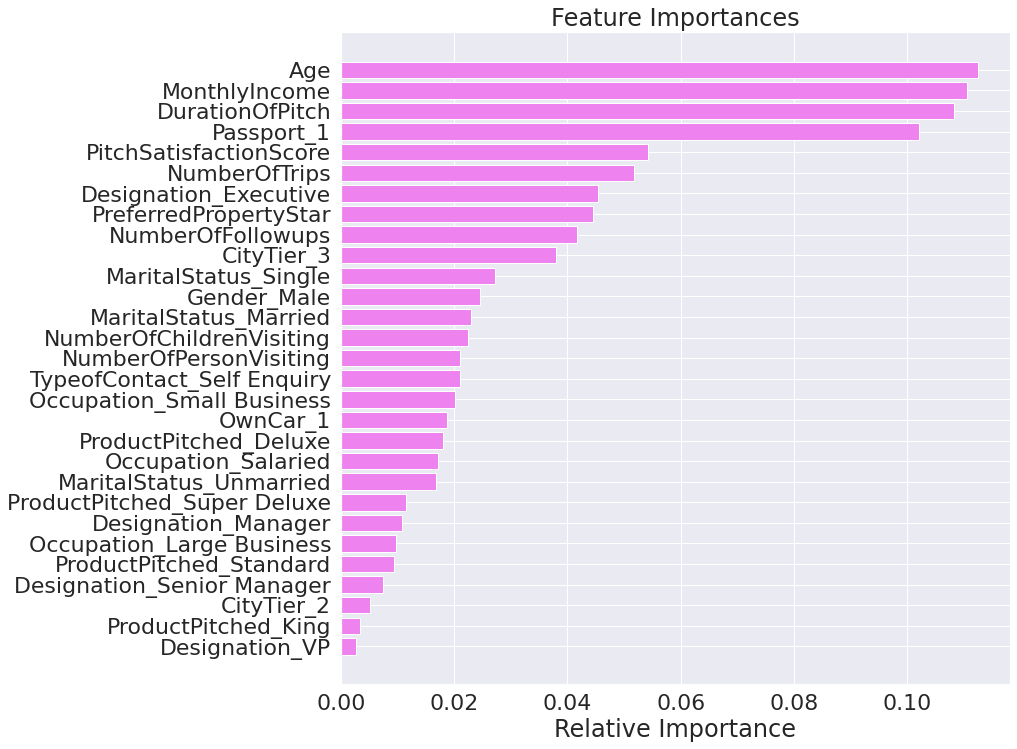

In [119]:
feature_names = X_train.columns
importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* The most important feature that predicts the customer buying the package is Age. Monthly Income is also very close to Age interms of predicting ability. Therefore in terms of business decision, the agency should aim at pitching their product to high income earners. This could also be because Age and MonthlyIncome are correlated.
* The 3rd and the 4th important features are: DurationOfPitch and Passport. This means, the agency should try to convince and sell product to relatively middle aged people, with passport, and should consider offering them an extended pitch time.
* Senior Managers, CityTier, and VP are among the least important predictors.

# **Conclusions:**
* Based on F1 score and issue of overfitting we select tuned random forest classifier as our final model.
* The most important feature that predicts the customer buying the package is MOnthly Income. 
* The 2,3,4 important features are: Age, Passport, DurationOfPitch. This means, the agency should try to convince and sell product to relatuvely middle aged people, with passport.
* Senior Managers and VP are among the least important predictors.

#**Recommendations:**
* In terms of business decision, the agency should aim at pitching their product to high income earners and those that lie in the right of the age distribution. This is because this is these two are he most important predictor of person buying the product.
* Managees and VPs are among the least importat predictors of person buying the product.
* From EDA we knew that monthly income is related to age. This means agency should consider age group greater than 34 and high earners.
* Customers who already have passports have higher chances of buying the package. Therefore, agency should target those customers.
* Agency should target pitching a bit longer to the potential customers, for example, high earning customers of age greater than 34, and those who have passports.


In [120]:
%%shell
jupyter nbconvert --to html /content/drive/MyDrive/AIML/Project4_TravelPackagePrediction/Project4_TravelPackage_Naresh.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/AIML/Project4_TravelPackagePrediction/Project4_TravelPackage_Naresh.ipynb to html
[NbConvertApp] Writing 1746100 bytes to /content/drive/MyDrive/AIML/Project4_TravelPackagePrediction/Project4_TravelPackage_Naresh.html
